In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import ast
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('biosensing_data.csv')

In [3]:
df = pd.DataFrame(data)
df.head()

,Sample_ID,Biosensor_Type,Pathogen_ID,Pathogen_Class,Microbial_Signature,Signal_Quality,Normalized_Data,Classification_Label
0,sample_0001,Electrochemical,pathogen_0001,Virus,"[0.686348465859171, 0.3519711095416459, 0.4792...",1,"[1.0, 0.5128169247104654, 0.6982014062284271]",Hepatitis
1,sample_0002,Electrochemical,pathogen_0002,Virus,"[0.511492541035177, 0.5906264985400667, 0.4373...",1,"[0.8660169198292051, 1.0, 0.7405203790625393]",Influenza
2,sample_0003,Optical,pathogen_0003,Fungi,"[0.34381169127876693, 0.3692560064866732, 0.11...",1,"[0.9310930228325897, 1.0, 0.316247859168712]",Aspergillus
3,sample_0004,Electrochemical,pathogen_0004,Bacteria,"[0.6662803385340104, 0.46467267273050455, 0.45...",1,"[1.0, 0.6974131545783041, 0.6764207193004899]",L. monocytogenes
4,sample_0005,Electrochemical,pathogen_0005,Bacteria,"[0.7666226216524994, 0.38892208052687616, 0.38...",1,"[1.0, 0.5073188157277855, 0.5053355232959593]",Salmonella


In [4]:
label_encoder = LabelEncoder()
df['classification_label_number'] = label_encoder.fit_transform(df.iloc[:, -1])
df.head()

,Sample_ID,Biosensor_Type,Pathogen_ID,Pathogen_Class,Microbial_Signature,Signal_Quality,Normalized_Data,Classification_Label,classification_label_number
0,sample_0001,Electrochemical,pathogen_0001,Virus,"[0.686348465859171, 0.3519711095416459, 0.4792...",1,"[1.0, 0.5128169247104654, 0.6982014062284271]",Hepatitis,4
1,sample_0002,Electrochemical,pathogen_0002,Virus,"[0.511492541035177, 0.5906264985400667, 0.4373...",1,"[0.8660169198292051, 1.0, 0.7405203790625393]",Influenza,5
2,sample_0003,Optical,pathogen_0003,Fungi,"[0.34381169127876693, 0.3692560064866732, 0.11...",1,"[0.9310930228325897, 1.0, 0.316247859168712]",Aspergillus,0
3,sample_0004,Electrochemical,pathogen_0004,Bacteria,"[0.6662803385340104, 0.46467267273050455, 0.45...",1,"[1.0, 0.6974131545783041, 0.6764207193004899]",L. monocytogenes,6
4,sample_0005,Electrochemical,pathogen_0005,Bacteria,"[0.7666226216524994, 0.38892208052687616, 0.38...",1,"[1.0, 0.5073188157277855, 0.5053355232959593]",Salmonella,8


In [5]:
# Convert the string representation of lists to actual lists
df['Microbial_Signature'] = df['Microbial_Signature'].apply(ast.literal_eval)

# Expand the list of arrays into separate columns
df_expanded = pd.DataFrame(df['Microbial_Signature'].tolist(), columns=['Feature1', 'Feature2', 'Feature3'])

print(df_expanded.head())  # Check the first few rows

   Feature1  Feature2  Feature3
0  0.686348  0.351971  0.479209
1  0.511493  0.590626  0.437371
2  0.343812  0.369256  0.116776
3  0.666280  0.464673  0.450686
4  0.766623  0.388922  0.387402


In [6]:
len(df_expanded)

1000

In [7]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data, then convert back to DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df_expanded), columns=df_expanded.columns)

print(df_normalized)

     Feature1  Feature2  Feature3
0    0.666791  0.435896  0.566644
1    0.519400  0.620483  0.536909
2    0.378056  0.449265  0.309061
3    0.649875  0.523065  0.546372
4    0.734457  0.464476  0.501396
..        ...       ...       ...
995  0.488021  0.666609  0.730681
996  0.456324  0.592471  0.543620
997  0.391847  0.743724  0.572914
998  0.539192  0.750129  0.614228
999  0.346004  0.566898  0.554001

[1000 rows x 3 columns]


In [8]:
X= df_normalized
y= df['classification_label_number']

In [9]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

Feature3    0.335360
Feature1    0.334384
Feature2    0.330255
dtype: float64


In [12]:
y_pred = rf.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.07666666666666666

In [14]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred_svc= svc.predict(X_test)

In [16]:
accuracy3 = accuracy_score(y_test, y_pred_svc)
accuracy3

0.11666666666666667

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred = knn.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.10333333333333333

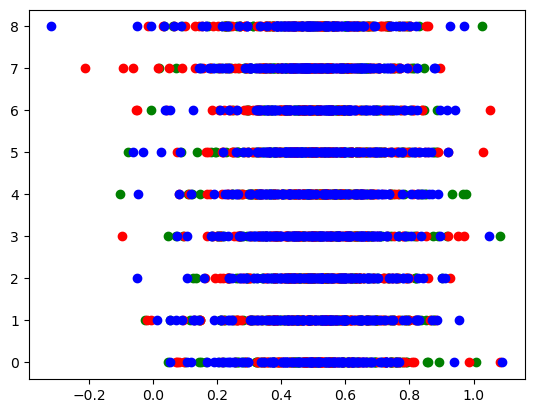

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df_expanded.iloc[:,0], df['classification_label_number'], color='green')
plt.scatter(df_expanded.iloc[:,1], df['classification_label_number'], color='red')
plt.scatter(df_expanded.iloc[:,2], df['classification_label_number'], color='blue')
